In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_pickle('./Discriptor_hfo2.pkl')
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [3]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern()
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,6.274031e-39,4.868723e-35,2.251073e-31,6.201119e-28,1.017786e-24,9.952886e-22,5.798926e-19,2.013038e-16,...,0.001413,0.001787,0.002558,0.003072,0.003398,0.004110,0.004837,0.004574,0.003350,0.001935
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,4.804097e-37,2.421562e-33,7.436718e-30,1.391453e-26,1.586199e-23,1.101662e-20,4.661662e-18,1.201808e-15,...,0.001368,0.001436,0.002387,0.004332,0.006577,0.008093,0.008030,0.006211,0.003627,0.001582
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,7.409008e-41,8.530821e-37,5.727059e-33,2.241726e-29,5.116152e-26,6.807919e-23,5.281963e-20,2.389387e-17,...,0.002100,0.002278,0.002809,0.004158,0.005137,0.004783,0.004021,0.003834,0.003549,0.002472
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,6.041906e-128,7.724956e-120,5.309403e-112,1.961710e-104,3.896522e-97,4.160923e-90,2.388871e-83,7.374115e-77,...,0.003345,0.005221,0.004560,0.002586,0.001515,0.001035,0.000503,0.000138,0.000021,0.000002
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,1.018675e-12,6.942950e-11,2.802394e-09,6.698709e-08,9.482654e-07,7.949604e-06,3.946734e-05,1.160398e-04,...,0.002221,0.002619,0.002921,0.002846,0.002909,0.003670,0.004553,0.004376,0.003123,0.001688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,3.182270e-114,5.602375e-107,5.659525e-100,3.280654e-93,1.091223e-86,2.082761e-80,2.281066e-74,1.433538e-68,...,0.004715,0.004896,0.003328,0.001496,0.000444,0.000193,0.000775,0.002926,0.006403,0.008044
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,2.100243e-40,2.473450e-36,1.688501e-32,6.681341e-29,1.532464e-25,2.037425e-22,1.570135e-19,7.013858e-17,...,0.001659,0.002858,0.004195,0.004837,0.004773,0.004220,0.003423,0.002731,0.002120,0.001409
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,2.145256e-13,1.668879e-11,7.677879e-10,2.088952e-08,3.361138e-07,3.198269e-06,1.799759e-05,5.989417e-05,...,0.002767,0.003910,0.004815,0.005397,0.005761,0.005669,0.004737,0.003112,0.001529,0.000540
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,5.180549e-14,6.261457e-12,4.236342e-10,1.604436e-08,3.401496e-07,4.036763e-06,2.681715e-05,9.972585e-05,...,0.002263,0.002095,0.002214,0.002434,0.002507,0.002954,0.004206,0.005702,0.006086,0.004473


In [4]:
labels_true = pd.read_pickle('./data_labels/labels_hfo2.pkl')
labels_true['labels_0_4'] = labels_true['labels_0_4'].replace({'m': 0,
                                                        'p-o': 1,
                                                        'o': 2,
                                                        't': 3,
                                                        'unknown': 4})

y_true = labels_true['labels_0_4']
# df.insert(loc=2, column='y_true', value=y_true)
y_true.values


array([0, 2, 1, ..., 2, 4, 3], dtype=int64)

In [5]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
X, y_true = shuffle(X, y_true, random_state=0)
X = X.values
X

array([[8.65479684e-037, 4.29520560e-033, 1.29627966e-029, ...,
        4.19566143e-003, 1.80262518e-003, 5.64125500e-004],
       [1.59866787e-013, 2.57593160e-011, 2.19399401e-009, ...,
        2.49490586e-003, 2.22682514e-003, 1.20213738e-003],
       [8.04966638e-125, 6.15472112e-117, 2.58096347e-109, ...,
        3.87984753e-005, 2.90155021e-006, 1.19247256e-007],
       ...,
       [4.58571520e-111, 4.99450807e-104, 3.17299492e-097, ...,
        3.44541644e-003, 6.61245208e-003, 7.40837882e-003],
       [1.93957448e-038, 1.45770354e-034, 6.50070302e-031, ...,
        4.02511702e-003, 2.41073305e-003, 1.15891446e-003],
       [1.75538098e-041, 2.33967391e-037, 1.80227568e-033, ...,
        3.42490988e-003, 2.80852287e-003, 1.95665668e-003]])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1.55580913e-026, 1.60749287e-024, 1.63081422e-022, ...,
        4.03213366e-001, 1.52100657e-001, 5.35116568e-002],
       [2.87380757e-003, 9.64049700e-003, 2.76020425e-002, ...,
        2.39762615e-001, 1.87893550e-001, 1.14032009e-001],
       [1.44702928e-114, 2.30342182e-108, 3.24704002e-102, ...,
        3.71894167e-003, 2.44645180e-004, 1.13092783e-005],
       ...,
       [8.24340271e-101, 1.86920880e-095, 3.99185870e-090, ...,
        3.31111232e-001, 5.57941375e-001, 7.02741925e-001],
       [3.48663030e-028, 5.45549678e-026, 8.17835786e-024, ...,
        3.86823231e-001, 2.03411222e-001, 1.09931982e-001],
       [3.15551920e-031, 8.75629590e-029, 2.26739407e-026, ...,
        3.29140453e-001, 2.36975695e-001, 1.85603990e-001]])

In [7]:
neigh = KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(neigh, X, y_true, cv=5, scoring='accuracy')
print(scores.mean())

0.9246376811594204


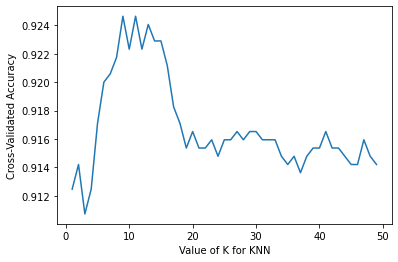

In [8]:
import matplotlib.pyplot as plt
# choose k between 1 to 31
k_range = range(1, 50)

k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_true, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [9]:
n_neighbors = 9
random_state = 0


In [10]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_true, test_size=0.25, stratify=y_true,
                     random_state=random_state)

In [11]:

dim = len(X[0])
n_classes = len(np.unique(y_true))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

In [12]:
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [13]:
# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

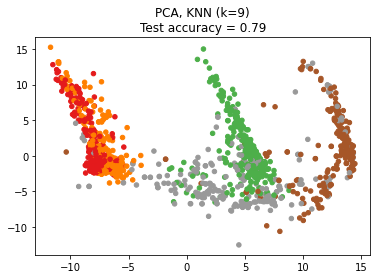

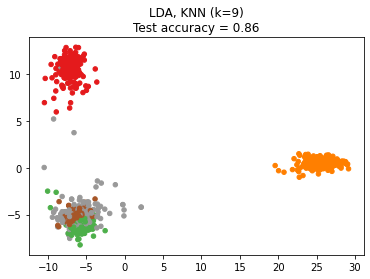

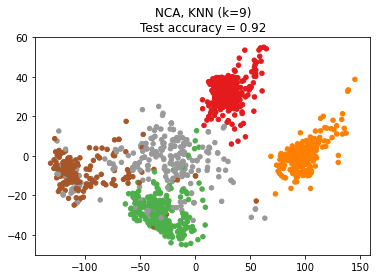

In [14]:
# plt.figure()
labels = {'0': 'red' ,'1': 'green','2': 'blue', '3': 'brown','4': 'yellow'}
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_true, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [15]:
# Random Forest
classifier = RandomForestClassifier(n_estimators = 18, criterion = 'entropy', random_state = 42)
scores = cross_val_score(classifier, X, y_true, cv=5, scoring='accuracy')
print(scores.mean())

0.9310144927536232


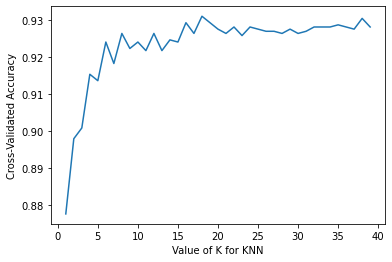

In [16]:
import matplotlib.pyplot as plt
# choose k between 1 to 31
k_range = range(1, 40)

k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    rfc =  RandomForestClassifier(n_estimators = k, criterion = 'entropy', random_state = 42)
    scores = cross_val_score(rfc, X, y_true, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
import numpy as np
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

#custom metric
def DTW(a, b):   
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0

    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

#train
parameters = {'n_neighbors':[9]}
clf = GridSearchCV(KNeighborsClassifier(metric=DTW), parameters, cv=5, verbose=1)
clf.fit(X_train, y_train)


#evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
